# TP N°5 - Circuitos trifásicos
__UNLZ - Facultad de Ingeniería__       
__Electrotecnia__      
__Alumno:__ Daniel Antonio Lorenzo

<a href="https://colab.research.google.com/github/daniel-lorenzo/Electrotecnia/blob/master/Ejercitacion/TP5.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

## Problema N°1
En una fuente trifásica de sistema de tensiones perfecta de secuencia directa ABC, conectada en estrella.
1. Expresar las tensiones de fase en forma fasorial y representar el esquema fasorial de tensiones de fase.
2. Obtener las tensiones compuestas o de línea y expresarlas en función del módulo de la tensión de fase.
3. Representar en un mismo esquema fasorial los sistemas de tensiones de fase y compuesta.

### Resolución:
__Punto 1:__ El ejercicio nos indica que la fuente de generación trifásica produce en bornes de sus 3 devanados un sistema de generación de tensiones o voltajes de <mark>tensiones prefecta </mark>. Esta será la condición de generación que utilizaremos en el desarrollo de todos nuestros problemas.

También nos indica, que la <mark>secuencia</mark> de generación es directa __ABC__ y que tendremos una carga conectada en estrella.

Siempre, dispondremos de una fuente generadora y de un receptor o carga.

<img src="img/tp5-1-1.png">

<img src="img/tp5-1-4.png">

<img src="img/tp5-1-5.png">

Se pretende transportar energía eléctrica trifásica, desde el generador hacia la carga, lo realizaremos a través de una línea de transporte.

El esquema que graficamos a continuación se denomina sistema __Trifilar__ por disponer de __3 conductores__.

<img src="img/tp5-1-2.png">

En caso se disponer de __4 conductores__ (incluye al conductor Neutro) lo denominaremos __Tetrafilar__.

__<mark>El sistema de tensiones perfecta</mark>__ es un sistema de tensiones que cumple con la condición de simetría: tensiones desfasadas entre si un mismo ángulo de 120° eléctricos y de módulos iguales entre sí, y cumple con la condición de equilibrio: la sumatoria de los fasores de tensión es igual a cero.

Los voltajes inducidos en las bobinas del generador son senoidales.

La representación gráfica del sistema trifásico perfecto, formado por tres tensiones senoidales del mismo valor eficaz, la misma frecuencia y desfasadas entre sí 120° eléctricos será:

<img src="img/tp5-1-3.png">

Se puede observar que en cualquier instante de tiempo:

$$ eA + eB + eC = 0 $$

El voltaje B está atrasado 120° eléctricos respecto de A y C pasa 240° después. Esto se llama secuencia ABC.

El cambio en la dirección rotacional $\curvearrowright^ \omega$ producirá A-C-B-A-C-B... Lo cual se llama secuencia indirecta o inversa o secuencia CBA.

A continuación, se indica la convención y las gráficas que adoptaremos para resolver los problemas. Los fasores están girando en el sentido de $\omega$ indicado en la figura.

La secuencia __ABC__ se representa de esta forma:

<img src="img/tp5-1-6.png">

La secuencia inversa o indirecta __CBA__ se representa de esta forma:

<img src="img/tp5-1-7.png">

La representación y las ecuaciones fasoriales.

<img src="img/tp5-1-8.png">

__Tensiones de fase__

$\begin{array}{lcl}
\color{red}{\vec{E}_{an}} = |E_{an}| e^{j0^\circ} &=& E e^{j0^\circ} \\
\color{red}{\vec{E}_{bn}} = |E_{bn}| e^{j240^\circ} &=& E e^{j240^\circ} \\
\color{red}{\vec{E}_{cn}} = |E_{cn}| e^{j120^\circ} &=& E e^{j120^\circ}
\end{array}$

Resultan 6 tensiones:

3 tensiones denominadas __"tensiones simples o de fase"__

$\color{red}{
\begin{array}{l}
\vec{E}_{an} \\
\vec{E}_{bn} \\
\vec{E}_{cn}
\end{array}}$

3 tensiones denominadas __"tensiones compuestas o tensiones de línea"__

$\begin{array}{l}
\color{blue}{\vec{E}_{ab}} = \vec{E}_{an} - \vec{E}_{bn} \\
\color{blue}{\vec{E}_{bc}} = \vec{E}_{bn} - \vec{E}_{cn} \\
\color{blue}{\vec{E}_{ca}} = \vec{E}_{cn} - \vec{E}_{an}
\end{array}$

El eje del fasor $\vec{E}_{an}$ se toma como referencia, los ángulos y módulos asociados a las tensiones compuestas son:

__Tensiones compuestas o de línea:__

$\begin{array}{l}
\color{blue}{\vec{E}_{ab}} = \vec{E}_{an} - \vec{E}_{bn} = \sqrt{3} E e^{j30^\circ} \\
\color{blue}{\vec{E}_{bc}} = \vec{E}_{bn} - \vec{E}_{cn} = \sqrt{3} E e^{j270^\circ} \\
\color{blue}{\vec{E}_{ca}} = \vec{E}_{cn} - \vec{E}_{an} = \sqrt{3} E e^{j150^\circ}
\end{array}$

__1.1__ Expresar las tensiones de fase en forma fasorial y representar el esquema fasorial de tensiones de fase.

Por las condiciones de perfección del sistema.

<mark style="background-color:powderblue">Condición de Simetría</mark>

$$ |\vec{E}_{an}| = |\vec{E}_{bn}| = |\vec{E}_{cn}| = E $$

<mark style="background-color:powderblue">Igualdad de ángulos entre tensiones de bobinas

$$ \alpha = \beta = \gamma = 120^\circ $$

<mark style="background-color:powderblue">Condición de Equilibrio</mark>

$$ \vec{E}_{an} + \vec{E}_{bn} + \vec{E}_{cn} = 0 $$

<mark>Esquema fasorial de las tensiones de fase y su secuencia directa ABC</mark>

<img src="img/tp5-1-6.png">

__1.2__ Obtener las tensiones compuestas o de línea y expresarlas en función del módulo de la tensión de fase

<img src="img/tp5-1-8.png">

$$ V_{ab} = E_{ab} = E_{an} e^{j0^\circ} - E_{bn} e^{j240^\circ} $$

In [15]:
import math, cmath

In [ ]:
# Datos
Ean = cmath.rect(1 , 0)
Ebn = cmath.rect(1 , math.radians(240) )
Ecn = cmath.rect(1 , math.radians(120) )

In [21]:
Vab = Ean - Ebn

In [20]:
print('|Vab| = %.3f*E [V]'%abs(Vab))
print('theta = %.2f°'%math.degrees( cmath.phase(Vab) ) )

|Vab| = 1.732*E V
theta = 30.00°


<div class="alert-danger">Entonces:
$$ V_{ab} = E_{ab} = \sqrt{3} E e^{j30^\circ} $$
    </div>

<img src="img/tp5-1-8.png">

$$ V_{bc} = E_{bc} = E_{bn} e^{j240^\circ} - E_{cn} e^{j120^\circ} $$

In [22]:
Vbc = Ebn - Ecn 

In [23]:
print('|Vbc| = %.3f*E V'%abs(Vbc))
print('theta = %.2f°'%math.degrees( cmath.phase(Vbc) ) )

|Vbc| = 1.732*E V
theta = -90.00°


<div class="alert-danger">Entonces:
$$ V_{bc} = E_{bc} = \sqrt{3} E e^{-j90^\circ} $$
</div>

<img src="img/tp5-1-8.png">

$$ V_{ca} = E_{ca} = E_{an} e^{j0^\circ} - E_{cn} e^{j120^\circ} $$

In [24]:
Vca = Ecn - Ean

In [25]:
print('|Vca| = %.3f*E V'%abs(Vca))
print('theta = %.2f°'%math.degrees( cmath.phase(Vca) ) )

|Vca| = 1.732*E V
theta = 150.00°


<div class="alert-danger">Entonces:
$$ V_{ca} = E_{ca} = \sqrt{3} E e^{j150^\circ} $$
    </div>

------------
__1.3__ Representar en un mismo esquema fasorial los sistemas de tensiones de fase y compuesta.

<img src="img/tp5-1-8.png">

__Tensiones de Fase__

$\begin{array}{lcl}
\color{red}{\vec{E}_{an}} = |E_{an}| e^{j0^\circ} &=& E e^{j0^\circ} \\
\color{red}{\vec{E}_{bn}} = |E_{bn}| e^{j240^\circ} &=& E e^{j240^\circ} \\
\color{red}{\vec{E}_{cn}} = |E_{cn}| e^{j120^\circ} &=& E e^{j120^\circ}
\end{array}
$

Resultan 6 tensiones:

3 tensiones denominadas __"tensiones simples o tensiones de fase"__
* $\color{red}{\vec{E}_{an}}$
* $\color{red}{\vec{E}_{bn}}$
* $\color{red}{\vec{E}_{cn}}$

3 tensiones denominadas "tensiones compuestas o tensiones de línea"
* $\color{blue}{\vec{E}_{ab}} = \vec{E}_{an} - \vec{E}_{bn} $
* $\color{blue}{\vec{E}_{bc}} = \vec{E}_{bn} - \vec{E}_{cn} $
* $\color{blue}{\vec{E}_{ca}} = \vec{E}_{cn} - \vec{E}_{an} $

Tensiones compuestas

* $\color{blue}{\vec{E}_{ab}} = \vec{E}_{an} - \vec{E}_{bn} = \sqrt{3} E e^{j30^\circ} $
* $\color{blue}{\vec{E}_{bc}} = \vec{E}_{bn} - \vec{E}_{cn} = \sqrt{3} E e^{j270^\circ} $
* $\color{blue}{\vec{E}_{ca}} = \vec{E}_{cn} - \vec{E}_{an} = \sqrt{3} E e^{j150^\circ} $

## Problema N°2
Un sistema trifásico de secuencia CBA (Secuencia Inversa o Indirecta), $3 \times 380 \, \mathrm{V}$ (tensión eficaz compuesta o de línea), de 4 conductores (tetrafilar), alimenta una carga trifásica equilibrada conectada en estrella.

El valor de cada impedancia es de 20 Ohm con ángulo de desfasaje de 30° capacitivo.

2.1 Calcular las corrientes $I_r$, $I_s$, $I_t$, $I_\mathrm{neutro}$, representar diagrama fasorial de tensiones y corrientes.

2.2 Determinar la potencia por fase y trifásica.

### Solución
El siguiente gráfico es una representación fasorial de las tensiones de fase del generador trifásico o fuente de energía, según lo solicitado en el enunciado del problema.

__Tensiones de fase    
Generación trifásica__

<img src="img/tp5-1-7.png">

## Conexión estrella-estrella balanceada

<div class="alert-info">
Un sistema Y-Y balanceado es un sistema trifásico con fuente balanceada conectada en Y y carga balanceada conectada en Y.
    </div>

<img src="img/tp5-2-1.png">

Las tensiones de generación las denominaremos con la letrea E, $E_{an}$, $E_{bn}$, $E_{cn}$.

Las <mark>caídas de tensión en las impedancias de carga las denominamos con la letra U</mark>, $U_{ao}$, $U_{bo}$, $U_{co}$

Las <mark>corrientes por los conductores</mark> que conectan el generador con la carga $I_r$, $I_s$, $I_t$ o $I_a$, $I_b$, $I_c$.

Las <mark>corrientes que circulan por la carga</mark> $I_a$, $I_b$, $I_c$.

La corriente que circula por el cuarto conductor, que une el centro de estrella del generador (n) y el neutro de la carga (o), se denomina corriente de Neutro, $I_\mathrm{neutro}$.

__Cálculos:__

Las tensiones de generación son Datos del problema $3 \times 380 \, \mathrm{V}$.
Esto significa, que entre bornes de salida el generador ab, bc, ca tenemos un valor de 380 V. Siendo esa una tensión de línea o compuesta.

Para sistemas perfectos, la relación entre la tensión compuesta y la de fase es $\sqrt{3} \cong 1,73$, es decir, si <mark>la tensión de línea</mark> es:

$$ E_\mathrm{linea} = 380 \, \mathrm{V} \quad (E_{ab} = E_{bc} = E_{ca} = 380 \, \mathrm{V}) $$

<mark>La tensión de fase</mark> es:

$$ E_\mathrm{fase} = {E_\mathrm{linea} \over \sqrt{3} } = 220 \, \mathrm{V} $$

$$ E_{an} = E_{bn} = E_{cn} = 220 \, \mathrm{V} $$

Las tensiones de generación son iguales a las caídas de tensión en las cargas cuando el sistema es generación en conexión estrella y cargas en conexión estrella.

$\begin{array}{l}
E_{an} = U_{ao} \\
E_{bn} = U_{bo} \\
E_{cn} = U_{co}
\end{array}$

La carga trifásica es equilibrada, conectada en estrella, eso significa que el valor de cada impedancia es igual entre ellas y su valor de $20 \, \Omega$ con ángulo desfasaje de 30° capacitivo.

$$ Z_a = Z_b = Z_c = 20 e^{-j30^\circ} \, \Omega $$

Aplicamos la ley de Ohm para corriente alterna.

$$ I_r = I_a = \frac{U_{ao}}{Z_a} = \frac{220 e^{j0^\circ} \, \mathrm{V}}{20 e^{-j30^\circ} \, \Omega} = 11 e^{j30^\circ} \, \mathrm{A} = (9,5 + j5,5) \, \mathrm{A} $$

$$ I_s = I_b = \frac{U_{bo}}{Z_b} = \frac{220 e^{j120^\circ} \, \mathrm{V}}{20 e^{-j30^\circ} \, \Omega} = 11 e^{j150^\circ} \, \mathrm{A} = (-9,5 + j5,5) \, \mathrm{A} $$

$$ I_t = I_c = \frac{U_{co}}{Z_c} = \frac{220 e^{j240^\circ} \, \mathrm{V}}{20 e^{-j30^\circ} \, \Omega} = 11 e^{j270^\circ} \, \mathrm{A} = - j11 \, \mathrm{A} $$

Aplicando la ley de Kirchhoff en el centro de estrella de la carga, podemos calcular <mark>la corriente de neutro, es la que circula por el cuarto conductor.</mark>

$$ I_\mathrm{neutro} = \sum_a^c I_i = (9,5+j5,5) + (-9,5+j5,5) + (-j11) = 0 \, \mathrm{A} $$

__Diagrama Fasorial de tensiones y corrientes en la carga:__

<img src="img/tp5-2-2.png">

__2.2__ Determinar la potencia por fase y trifásica

En todo sistema tenemos que calcular:

La __Potencia Activa (P)__ medida en Watts.

La __Potencia Reactiva (Q)__ medida en VAr.

La __Potencia Aparente (S)__ medida en VA.

Recordando el <mark>triángulo de potencias.</mark>

<img src="img/tp5-2-3.png">

A cada una de las fases le corresponderá un valor de potencia monofásica:

Potencia Activa P (Watt): $P_a, \; P_b , \; P_c$

Potencia Reactiva Q (VAr): $Q_a , \; Q_b , \; Q_c$

Potencia Aparente S (VA): $S_a, \; S_b , \; S_c$

__La Potencia trifásica "Activa, Reactiva y Aparente"__ se calculará como la sumatoria de las potencias de cada una de las fases.

Para calcular la __potencia Activa trifásica__ y __Reactiva trifásica__ la __sumatoria__ se podrá realizar __algebráicamente__.

$$ P_\mathrm{trifasica} = P_a + P_b + P_c $$

$$ Q_\mathrm{trifasica} = Q_a + Q_b + Q_c $$

Para la potencia Aparente, lo conveniente, para no cometer errores, es usar para el cálculo, el teorema de Pitágoras aplicando el triángulo de potencias.

$$ S_\mathrm{trifasica} = \sqrt{ (P_\mathrm{trifasica})^2 + (Q_\mathrm{trifasica})^2 } $$

Las impedancias o cargas de cada una de las fases son iguales entre sí.

$$ Z_a = Z_b = Z_c = 20e^{-j30^\circ} \, \Omega $$

__Cálculo de la Potencia Activa P monofásica.__

$$ U_f = U_{ao} = U_{bo} = U_{co} \quad \mbox{(Tensión de cada fase)} $$

$$ I_f = I_a = I_b = I_c \quad \mbox{(Corriente de cada fase)} $$

$\varphi_a =$ ángulo de la impedancia (a) o ángulo de carga (a) desfasaje entre la caída de tensión (Uao) y la corriente (Ia) que circula por la carga)

$\varphi_a = \varphi_b = \varphi_c = \varphi$

In [1]:
import math, cmath

In [2]:
# Datos
E_linea = 380 # V
phi = math.radians(-30)
E_fase = E_linea/math.sqrt(3)
Ean = cmath.rect(E_fase, math.radians(0) )
Ebn = cmath.rect(E_fase, math.radians(120))
Ecn = cmath.rect(E_fase, math.radians(240))
Uao = Ean
Ubo = Ebn
Uco = Ecn
Za = cmath.rect(20 , phi)
Zb = Za
Zc = Za

Ley de Ohm
$$ I = \frac{U}{Z} $$

In [3]:
Ia = Uao/Za
Ib = Ubo/Zb
Ic = Uco/Zc

In [4]:
print('Ia = {:.2f} A'.format(Ia))
print('Ib = {:.2f} A'.format(Ib))
print('Ic = {:.2f} A'.format(Ic))

Ia = 9.50+5.48j A
Ib = -9.50+5.48j A
Ic = -0.00-10.97j A


Sistema balanceado
$$ \sum_a^c I_i = 0 $$

In [5]:
Sum_I = Ia + Ib + Ic

In [6]:
print('|Sum_I| = %.2f A'%abs(Sum_I))

|Sum_I| = 0.00 A


Potencia aparente
$$ \vec{S} = \vec{U} \times (\vec{I})^\ast $$

Potencia real
$$ P = |\vec{S}| \cos \varphi $$

Potencia reactiva
$$ Q = |\vec{S}| \sin \varphi $$

In [7]:
# Potencia aparente
Sa = Uao*Ia.conjugate()
Sb = Ubo*Ib.conjugate()
Sc = Uco*Ic.conjugate()
# Potencia real
Pa = Sa.real
Pb = Sb.real
Pc = Sc.real
# Potencia reactiva
Qa = Sa.imag
Qb = Sb.imag
Qc = Sc.imag

In [23]:
print('Potencia aparente:')
print('|Sa| = %.2f VA'%abs(Sa))
print('|Sb| = %.2f VA'%abs(Sb))
print('|Sc| = %.2f VA'%abs(Sc))

Potencia aparente:
|Sa| = 2406.67 VA
|Sb| = 2406.67 VA
|Sc| = 2406.67 VA


In [21]:
print('Potencia real:')
print('Pa = %.2f W'%Pa)
print('Pb = %.2f W'%Pb)
print('Pc = %.2f W'%Pc)

Potencia real:
Pa = 2084.23 W
Pb = 2084.23 W
Pc = 2084.23 W


In [22]:
print('Potencia reactiva:')
print('Qa = %.2f VAr'%Qa)
print('Qb = %.2f VAr'%Qb)
print('Qc = %.2f VAr'%Qc)

Potencia reactiva:
Qa = -1203.33 VAr
Qb = -1203.33 VAr
Qc = -1203.33 VAr


Potencia trifásica real
$$ P_\mathrm{trifasica} = P_a + P_b + P_c $$

Potencia trifásica reactiva
$$ Q_\mathrm{trifasica} = Q_a + Q_b + Q_c $$

Potencia trifásica aparente
$$ S_\mathrm{trifasica} = \sqrt{(P_\mathrm{trifasica})^2 + (Q_\mathrm{trifasica})^2} $$

In [11]:
P_trifasica = Pa + Pb + Pc
Q_trifasica = Qa + Qb + Qc
S_trifasica = math.sqrt(P_trifasica**2 + Q_trifasica**2)

In [12]:
print('P_trifasica = %.2f W'%P_trifasica)
print('Q_trifasica = %.2f W'%Q_trifasica)
print('S_trifasica = %.2f W'%S_trifasica)

P_trifasica = 6252.70 W
Q_trifasica = -3610.00 W
S_trifasica = 7220.00 W


__Como comprobación, aplicamos la ecuación a la resolución del ejercicio__

Potencia trifásica real
$$ P_\mathrm{trifasica} = \sqrt{3} \cdot 380 |I_\mathrm{fase}| \cos \varphi $$

Potencia trifásica reactiva
$$ Q_\mathrm{trifasica} = \sqrt{3} \cdot 380 |I_\mathrm{fase}| \sin \varphi $$

Potencia trifásica aparente
$$ S_\mathrm{trifasica} = \sqrt{3} \cdot 380 |I_\mathrm{fase}| $$

In [ ]:
P_trif = math.sqrt(3)*380*abs(Ia)*math.cos( phi )
Q_trif = math.sqrt(3)*380*abs(Ia)*math.sin( phi )
S_trif = math.sqrt(3)*380*abs(Ia)

In [19]:
print('P_trif = %.2f W'%P_trif)
print('Q_trif = %.2f VAr'%Q_trif)
print('S_trif = %.2f VA'%S_trif)

P_trif = 6252.70 W
Q_trif = -3610.00 VAr
S_trif = 7220.00 VA


__Simulación en qucs__
<img src="img/tp5-2-4.svg" width="800">

In [24]:
%reset -s -f

## Problema 3
Un sistema trifásico de secuencia CBA $3 \times 380 \, \mathrm{V}$ de 4 conductores, alimenta una carga trifásica conectada en estrella.

$Z_a = 6 \; \Omega$ con ángulo de desfasaje 0°

$Z_b = 6 \, \Omega$ con ángulo de desfasaje 30° inductivo

$Z_c = 5 \, \Omega$ con ángulo de desfasaje 45° inductivo

__3.1__ Calcular las corrientes $I_r, \, I_s, \, I_t, \, I_\mathrm{neutro}$, representar el diagrama fasorial de tensiones y corrientes.

__3.2__ Determinar la potencia en cada fase y la potencia trifásica.

### Solución
El siguiente gráfico es una representación fasorial de las tensiones de fase del generador trifásico o fuente de energía, según lo solicitado en el enunciado de problema.

__Tensiones de fase    
Generación trifásica__

<img src="img/tp5-1-7.png">

## Conexión estrella-estrella

<img src="img/tp5-2-1.png">

Las tensiones de generación son datos del problema $3 \times 380 \, \mathrm{V}$. Esto significa, que entre los bornes de salida el generador ab, bc, ca tenemos un valor de 380 V. Siendo esa una tensión de línea o compuesta.

In [1]:
import math, cmath

In [2]:
# Tensión de línea
E_lin = 380 # V
# Tensión de fase
E_fase = E_lin/math.sqrt(3)
# Tensiones de generación
Ean = cmath.rect(E_fase , math.radians(0) )
Ebn = cmath.rect(E_fase , math.radians(120) )
Ecn = cmath.rect(E_fase , math.radians(240) )
# Caídas de tensión en las cargas
Uao = Ean ; Ubo = Ebn ; Uco = Ecn

<div class="alert-danger">
<strong>La carga trifásica NO es equilibrada</strong>, conectada en estrella, eso significa que las tres impedancias <strong>NO SON iguales</strong> entre sí.
    </div>

__3.1__ Calcular las corrientes $I_r, \, I_s, \, I_t, \, I_\mathrm{neutro}$, representar el diagrama fasorial de tensiones y corrientes.

In [3]:
# Datos
Za = cmath.rect(6 , 0) # Ohm
Zb = cmath.rect(6 , math.radians(30)) # Ohm
Zc = cmath.rect(5 , math.radians(45)) # Ohm

In [4]:
# Cálculo de la intensidad de corriente en fase a
Ia = Uao/Za
Ib = Ubo/Zb
Ic = Uco/Zc
Ir = Ia ; Is = Ib ; It = Ic

In [5]:
print('Corrientes de fase:')
print('Ia = Ir = ({:.2f}) A'.format(Ia))
print('Ib = Is = ({:.2f}) A'.format(Ib))
print('Ic = It = ({:.2f}) A'.format(Ic))

Corrientes de fase:
Ia = Ir = (36.57+0.00j) A
Ib = Is = (0.00+36.57j) A
Ic = It = (-42.38-11.36j) A


In [6]:
# Cálculo de intensidad de corriente de NEUTRO (en el cuarto conductor)
In = Ia + Ib + Ic

In [7]:
print('In = ({:.2f}) A'.format(In))
print('In = (%.2f < %.2f°) A'%(abs(In) , math.degrees( cmath.phase(In) ) ))

In = (-5.82+25.21j) A
In = (25.87 < 103.00°) A


In [8]:
import matplotlib
import matplotlib.pyplot as plt

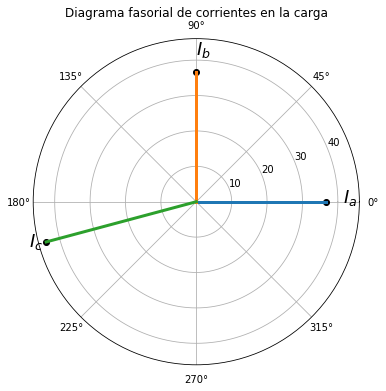

In [20]:
%matplotlib inline
plt.figure(figsize=(6,6))

plt.polar( cmath.phase(Ia) , abs(Ia), 'ko')
plt.text( cmath.phase(Ia) , abs(Ia) + 5 , r'$I_a$', fontsize=18)
plt.polar( cmath.phase(Ib) , abs(Ib), 'ko')
plt.text( cmath.phase(Ib) , abs(Ib) + 5 , r'$I_b$', fontsize=18)
plt.polar( cmath.phase(Ic) , abs(Ic) , 'ko')
plt.text( cmath.phase(Ic) , abs(Ic) + 5 , r'$I_c$', fontsize=18)

plt.polar([0, cmath.phase(Ia) ],[0, abs(Ia) ],linewidth=3)
plt.polar([0, cmath.phase(Ib) ],[0, abs(Ib) ],linewidth=3)
plt.polar([0, cmath.phase(Ic) ],[0, abs(Ic) ],linewidth=3)
plt.title('Diagrama fasorial de corrientes en la carga')

plt.show()

3.2 Determinar la potencia en cada fase y la potencia trifásica.

In [51]:
Sa = Uao*Ia.conjugate()
Sb = Ubo*Ib.conjugate()
Sc = Uco*Ic.conjugate()
Pa = Sa.real
Pb = Sb.real
Pc = Sc.real
Qa = Sa.imag
Qb = Sb.imag
Qc = Sc.imag

In [55]:
print('Pa = %.1f W'%Pa)
print('Pb = %.1f W'%Pb)
print('Pc = %.1f W'%Pc)
print('Qa = %.1f VAr'%Qa)
print('Qb = %.1f VAr'%Qb)
print('Qc = %.1f VAr'%Qc)

Pa = 8022.2 W
Pb = 6947.4 W
Pc = 6807.1 W
Qa = 0.0 VAr
Qb = 4011.1 VAr
Qc = 6807.1 VAr


In [56]:
# Cálculo de la potencia activa P trifásica
P_trif = Pa + Pb + Pc
# Cálculo de la potencia reactiva Q trifásica
Q_trif = Qa + Qb + Qc

In [57]:
print('P_trif = %.2f W'%P_trif)
print('Q_trif = %.2f VAr'%Q_trif)

P_trif = 21776.75 W
Q_trif = 10818.19 VAr


$$ |S_\mathrm{trifasica}| = |S_a + S_b + S_c| $$

$$ |S_\mathrm{trifasica}| = \sqrt{ (P_\mathrm{trifasica})^2 + (Q_\mathrm{trifasica})^2 } $$

In [65]:
# Cálculo de la potencia aparente S trifásica
S_trif = Sa + Sb + Sc

In [66]:
print('S_trif = (%.2f < %.2f°) VA'%(abs(S_trif) , math.degrees( cmath.phase(S_trif) ) ))

S_trif = (24315.84 < 26.42°) VA


## Problema 4
Un sistema trifásico de secuencia ABC (secuencia directa), $3 \times 380 \, \mathrm{V}$ (tensiones de línea en valor eficaz), de 3 conductores (sistema trifilar), alimenta una carga trifásica __equilibrada y simétrica (perfecta)__ conectada en triángulo.

El valor de cada impedancia es de 5 Ohm con ángulo de desfasaje de 45° inductivo.

1. Calcular las corrientes $I_r, \; I_s, \; I_t$, representar el diagrama fasorial de tensiones y corrientes.
2. Determinar las potencias por fase y trifásica $(P, \; Q, \; S)$

<img src="../img/ej12-3.png">

>Las impedancias de carga son iguales entre sí, (carga trifásica equilibrada y simétrica perfecta)

$$ |Z| = |Z_{ab}| = |Z_{bc}| = |Z_{ca}| $$

El valor de cada impedancia es de 5 Ohm con ángulo de desfasaje de 45° inductivo.

Los modulos de las intensidades de corriente en las impedancias de carga son iguales entre sí (carga trifásica equilibrada).

$$ |I_{\Delta}| = |I_{ab}| = |I_{bc}| = |I_{ca}| $$

Los modulos de la tensión aplicada compuesta o caídas de tensión compuesta U, en las impedancias de carga son iguales entre sí.

$$ |U_\mathrm{linea}| = |U_{ab}| = |U_{bc}| = |U_{ca}| $$

A las corrientes que circuilan por fuera del triángulo de cargas denominados corrientes de línea: $I_r, \; I_s, \; I_t$ y a las corrientes que circulan por las impedancias de carga $I_{ab}, \; I_{ca}, \; I_{bc}$ (estas últimas mantienen la convención de letras utilizada para las tensiones $ab, \; ca, \; bc$.

La relación entre las corrientes de línea y las corrientes que circulan dentro del triángulo es la siguiente:

$$ \frac{I_\mathrm{linea}}{I_\Delta} = \sqrt{3} $$

Aplicamos la ley de Kirchhoff de corrientes en el nodo $a$, en bornes del triángulo de cargas.

$$ I_\mathrm{linea} = I_r = I_{ab} - I_{ca} \quad \mbox{(Nodo A)} $$

Aplicamos la ley de Kirchhoff de corrientes en el nodo $b$, en bornes del triángulo de cargas.

$$ I_\mathrm{linea} = I_s = I_{bc} - I_{ab} \quad \mbox{(Nodo B)} $$

Aplicamos la ley de Kirchhoff de corrientes en el nodo $c$, en bornes del triángulo de cargas.

$$ I_\mathrm{linea} = I_t = I_{ca} - I_{bc} \quad \mbox{(Nodo C)} $$

1. Calcular las corrientes $I_r, \; I_s, \; I_t$ representar el diagrama fasorial de tensiones y corrientes.

Cálculos: $I_{ab}, \; I_{bc}, \; I_{ca}$

Tenemos que usar la tensión compuesta: 380 V para calcular las intensidades de corriente en cada impedancia del triángulo de cargas.

In [1]:
import numpy as np
import cmath, math

In [2]:
# Datos:
Uab = cmath.rect( 380 , np.deg2rad(30) )
Za = cmath.rect( 5, np.deg2rad(45) )

In [3]:
Iab = Uab/Za

In [4]:
print('Iab = (%.1f < %.2f°) A'%( abs(Iab) , np.rad2deg( cmath.phase(Iab) ) ))
print('Iab = {:.2f} A'.format(Iab))

Iab = (76.0 < -15.00°) A
Iab = 73.41-19.67j A


In [5]:
# Datos:
Ubc = cmath.rect( 380 , np.deg2rad(270) )
Zb = Za

In [6]:
Ibc = Ubc/Zb

In [7]:
print('Ibc = (%.1f < %.2f°) A'%( abs(Ibc) , np.rad2deg( cmath.phase(Ibc) ) ))
print('Ibc = {:.2f} A'.format(Ibc))

Ibc = (76.0 < -135.00°) A
Ibc = -53.74-53.74j A


In [8]:
Uca = cmath.rect(380,np.deg2rad(150))
Zc = Za

In [9]:
Ica = Uca/Zc

In [10]:
print('Ica = (%.1f < %.2f°) A'%( abs(Ica) , np.rad2deg( cmath.phase(Ica) ) ))
print('Ica = {:.2f} A'.format(Ica))

Ica = (76.0 < 105.00°) A
Ica = -19.67+73.41j A


Las impedancias de carga son equilibradas y simétricas.

$$ Z_\Delta = Z_{ab} = Z_{bc} = Z_{ca} = 5e^{j45^\circ} \, \Omega $$

En esas condiciones:

$$ \sum_a^c I_\Delta = I_{ab} + I_{bc} + I_{ca} = 0 $$

Cálculos: $I_r, \; I_s, \; I_t$

Aplicando las ley de Kirchhoff de corrientes:

In [11]:
Ir = Iab - Ica
Is = Ibc - Iab
It = Ica - Ibc

In [12]:
print('Ir = {:.2f} A'.format(Ir))
print('Ir = (%.1f < %.2f°) A'%(abs(Ir) , np.rad2deg(cmath.phase(Ir)) ))
print('-----------------------')
print('Is = {:.2f} A'.format(Is))
print('Is = (%.1f < %.2f°) A'%(abs(Is) , np.rad2deg(cmath.phase(Is)) ))
print('-----------------------')
print('It = {:.2f} A'.format(It))
print('It = (%.1f < %.2f°) A'%(abs(It) , np.rad2deg(cmath.phase(It)) ))

Ir = 93.08-93.08j A
Ir = (131.6 < -45.00°) A
-----------------------
Is = -127.15-34.07j A
Is = (131.6 < -165.00°) A
-----------------------
It = 34.07+127.15j A
It = (131.6 < 75.00°) A


$$ |I_\mathrm{linea}| = |I_r| = |I_s| = |I_t| $$

Corrientes del triángulo de cargas:

$$ |I_{ab}| = |I_{bc}| = |I_{ca}| $$

Relación entre las corrientes de línea y las corrientes del triángulo de cargas (módulos):

$$ \frac{I_\mathrm{linea}}{I_\Delta} = \sqrt{3} $$

In [13]:
I_linea = abs(Ir)
I_Delta = abs(Iab)

I_linea/I_Delta

1.7320508075688772

In [14]:
np.sqrt(3)

1.7320508075688772

### Potencias de fase
Las potencias consideradas de fase se corresponden con las de cada una de las potencias de cada una de las impedancias de carga del triángulo.

El ingreso de los conductores a los vértices del triángulo de cargas define como se conecta e identifica cada una de las fases conectadas.

Por eso, para hablar de potencias de fase en el triángulo, es adecuado, hablar de potencias en impedancias entre bornes del triángulo.

Se calcula como la tensión compuesta multiplicada por la intensidad de corriente que circula por la impedancia por el $\cos \varphi$ del ángulo de carga de la impedancia o ángulo de desfasaje entre la tensión compuesta y la corriente que circula por la impedancia de carga.

Recordamos:
$$ |U_\mathrm{linea}| = |U_{ab}| = |U_{bc}| = |U_{ca}| $$

Potencia activa (W)

In [15]:
Sab = Uab*Iab.conjugate()
Sbc = Ubc*Ibc.conjugate()
Sca = Uca*Ica.conjugate()

Pab = Sab.real
Pbc = Sbc.real
Pca = Sca.real

Qab = Sab.imag
Qbc = Sab.imag
Qca = Sca.imag

In [16]:
print('Pab = %.0f W'%Pab)
print('Pbc = %.0f W'%Pbc)
print('Pca = %.0f W'%Pca)

Pab = 20421 W
Pbc = 20421 W
Pca = 20421 W


In [17]:
print('Qab = %.0f VAr'%Qab)
print('Qbc = %.0f VAr'%Qbc)
print('Qca = %.0f VAr'%Qca)

Qab = 20421 VAr
Qbc = 20421 VAr
Qca = 20421 VAr


In [18]:
print('|Sab| = %.0f VA'%abs(Sab))
print('|Sbc| = %.0f VA'%abs(Sbc))
print('|Sca| = %.0f VA'%abs(Sca))

|Sab| = 28880 VA
|Sbc| = 28880 VA
|Sca| = 28880 VA


### Potencias trifásicas
En este caso, al ser un sistema trifásico equilibrado y simétrico para calcular las potencias trifásicas P,Q,S del sistema, se puede multiplicar por 3 las potencias calculadas en cada impedanci correspondientemente (únicamente para este caso)

$$\begin{array}{l}
3 \, P_{ab} = 3 \, P_{bc} = 3 \, P_{ca} = P_\mathrm{trifasica} \\
3 \, Q_{ab} = 3 \, Q_{bc} = 3 \, Q_{ca} = Q_\mathrm{trifasica} \\
3 \, S_{ab} = 3 \, S_{bc} = 3 \, S_{ca} = S_\mathrm{trifasica} \\
\end{array}$$

Para los casos generales (aplicable también para este caso)

$$ P_\mathrm{trifasica} = P_{ab} + P_{bc} + P_{ca} = P_\mathrm{trifasica} $$

$$ Q_\mathrm{trifasica} = Q_{ab} + Q_{bc} + Q_{ca} = Q_\mathrm{trifasica} $$

$$ S_\mathrm{trifasica} = \sqrt{P_\mathrm{trifasica}^2 + Q_\mathrm{trifasica}^2} $$

In [20]:
P_trif = 3*Pab
Q_trif = 3*Qab
S_trif = 3*abs(Sab)

In [22]:
print('P_trif = %.0f W'%P_trif)
print('Q_trif = %.0f VAr'%Q_trif)
print('S_trif = %.0f VA'%S_trif)

P_trif = 61264 W
Q_trif = 61264 VAr
S_trif = 86640 VA


## Problema 5
Un sistema trifásico de secuencia ABC $3 \times 380 \, \mathrm{V}$, de 3 conductores, alimenta una carga trifásica conectada en triángulo.

$Z_{ab} = 10 \, \Omega$ con ángulo de desfasaje 0°        
$Z_{bc} = 10 \, \Omega$ con ángulo de desfasaje 30° inductivo      
$Z_{ca} = 15 \, \Omega$ con ángulo de desfasaje 30° capacitivo

1. Calcular las corrientes $I_r, \, I_s, \, I_t$, representar diagrana fasorial de tensiones y corrientes.
2. Determinar las potencias en cada fase y las potencias trifásicas (P, Q, S)

<img src="img/tp5ej5.png">

## Solución

Calcular las corrientes $I_r, \, I_s, \, I_t$, representar diagrana fasorial de tensiones y corrientes.

Tenemos que usar la tensión compuessta: 380V para calcular las intensidades de corriente en cada impedancia del triángulo de cargas.

In [1]:
import numpy as np
import cmath

In [2]:
# Datos:
Uab = cmath.rect(380 , np.deg2rad(30) )
Ubc = cmath.rect(380 , np.deg2rad(270) )
Uca = cmath.rect(380 , np.deg2rad(150) )
Zab = cmath.rect(10 ,0)
Zbc = cmath.rect(10, np.deg2rad(30) )
Zca = cmath.rect(15, np.deg2rad(-30))

In [3]:
# Cálculo de Iab, Ibc, Ica
Iab = Uab/Zab ; Ibc = Ubc/Zbc ; Ica = Uca/Zca

In [9]:
print('Iab = (%.1f < %.1f°) A'%(abs(Iab), np.rad2deg( cmath.phase(Iab) ) ))
print('Iab = {:.2f} A'.format(Iab))
print()
print('Ibc = (%.1f < %.1f°) A'%(abs(Ibc), np.rad2deg( cmath.phase(Ibc) ) ))
print('Ibc = {:.2f} A'.format(Ibc))
print()
print('Ica = (%.1f < %.1f°) A'%(abs(Ica), np.rad2deg( cmath.phase(Ica) ) ))
print('Ica = {:.2f} A'.format(Ica))

Iab = (38.0 < 30.0°) A
Iab = 32.91+19.00j A

Ibc = (38.0 < -120.0°) A
Ibc = -19.00-32.91j A

Ica = (25.3 < -180.0°) A
Ica = -25.33-0.00j A


In [15]:
# Cálculo de Ir, Is, It
# Nodo a:
Ir = Iab - Ica
# Nodo b:
Is = Ibc - Iab
# Nodo c:
It = Ica - Ibc

Ia = Ir ; Ib = Is ; Ic = It

In [11]:
print('Ir = (%.1f < %.1f°) A'%(abs(Ir), np.rad2deg( cmath.phase(Ir) ) ))
print('Ir = {:.2f} A'.format(Ir))
print()
print('Is = (%.1f < %.1f°) A'%(abs(Is), np.rad2deg( cmath.phase(Is) ) ))
print('Is = {:.2f} A'.format(Is))
print()
print('It = (%.1f < %.1f°) A'%(abs(It), np.rad2deg( cmath.phase(It) ) ))
print('It = {:.2f} A'.format(It))

Ir = (61.3 < 18.1°) A
Ir = 58.24+19.00j A

Is = (73.4 < -135.0°) A
Is = -51.91-51.91j A

It = (33.5 < 100.9°) A
It = -6.33+32.91j A


In [13]:
import matplotlib
import matplotlib.pyplot as plt

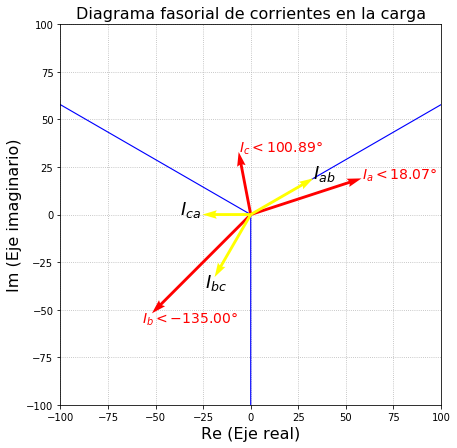

Ia  = (61.26 < 18.07°) A
Ib  = (73.41 < -135.00°) A
Ic  = (33.51 < 100.89°) A
Iab = (38.00 < 30.00°) A
Ibc = (38.00 < -120.00°) A
Ica = (25.33 < -180.00°) A
Uab = (380.00 < 30.00°) V
Ubc = (380.00 < -90.00°) V
Uca = (380.00 < 150.00°) V


In [132]:
%matplotlib inline
plt.figure(figsize=(7,7))
ax = plt.gca()
ax.quiver(0,0,Uab.real,Uab.imag,width=0.003,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(0,0,Ubc.real,Ubc.imag,width=0.003,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(0,0,Uca.real,Uca.imag,width=0.003,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(0,0,Ia.real,Ia.imag,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,Ib.real,Ib.imag,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,Ic.real,Ic.imag,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,Iab.real,Iab.imag,angles='xy',scale_units='xy',scale=1,color='yellow')
ax.quiver(0,0,Ibc.real,Ibc.imag,angles='xy',scale_units='xy',scale=1,color='yellow')
ax.quiver(0,0,Ica.real,Ica.imag,angles='xy',scale_units='xy',scale=1,color='yellow')
plt.text(Ia.real, Ia.imag, r'$I_a < %.2f°$'%(np.rad2deg(cmath.phase(Ia))), fontsize=14, color='red')
plt.text(Ib.real - 5 , Ib.imag - 5, r'$I_b < %.2f$°'%(np.rad2deg(cmath.phase(Ib))), fontsize=14, color='red')
plt.text(Ic.real, Ic.imag, r'$I_c < %.2f$°'%(np.rad2deg(cmath.phase(Ic))), fontsize=14, color='red')
plt.text(Iab.real, Iab.imag, r'$I_{ab}$', fontsize=18, fontweight='bold')
plt.text(Ibc.real - 5 , Ibc.imag - 5, r'$I_{bc}$', fontsize=18, fontweight='bold')
plt.text(Ica.real - 12, Ica.imag, r'$I_{ca}$', fontsize=18, fontweight='bold')
#plt.axhline(y=0, xmin=0.5, xmax=1, linestyle="--")
ax.set_aspect('equal')
plt.title('Diagrama fasorial de corrientes en la carga', fontsize=16)
plt.xlabel('Re (Eje real)',  fontsize=16)
plt.ylabel('Im (Eje imaginario)',  fontsize=16)
plt.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_xlim([-100,100])
ax.set_ylim([-100,100])
#plt.draw()
plt.show()
print('Ia  = (%.2f < %.2f°) A'%(abs(Ir), np.rad2deg( cmath.phase(Ir) ) ))
print('Ib  = (%.2f < %.2f°) A'%(abs(Is), np.rad2deg( cmath.phase(Is) ) ))
print('Ic  = (%.2f < %.2f°) A'%(abs(It), np.rad2deg( cmath.phase(It) ) ))
print('Iab = (%.2f < %.2f°) A'%(abs(Iab), np.rad2deg( cmath.phase(Iab) ) ))
print('Ibc = (%.2f < %.2f°) A'%(abs(Ibc), np.rad2deg( cmath.phase(Ibc) ) ))
print('Ica = (%.2f < %.2f°) A'%(abs(Ica), np.rad2deg( cmath.phase(Ica) ) ))
print('Uab = (%.2f < %.2f°) V'%(abs(Uab), np.rad2deg( cmath.phase(Uab) ) ))
print('Ubc = (%.2f < %.2f°) V'%(abs(Ubc), np.rad2deg( cmath.phase(Ubc) ) ))
print('Uca = (%.2f < %.2f°) V'%(abs(Uca), np.rad2deg( cmath.phase(Uca) ) ))

In [125]:
Sab = Uab*Iab.conjugate()
Sbc = Ubc*Ibc.conjugate()
Sca = Uca*Ica.conjugate()

Pab = Sab.real
Pbc = Sbc.real
Pca = Sca.real

Qab = Sab.imag
Qbc = Sbc.imag
Qca = Sca.imag

In [126]:
print('Potencia activa (W)')
print('Pab = %.1f W'%Pab)
print('Potencia reactiva (VAr)')
print('Qab = %.1f VAr'%Qab)
print('Potencia aparente (VA)')
print('|Sab| = %.1f VA'%abs(Sab))
print()
print('Potencia activa (W)')
print('Pbc = %.1f W'%Pbc)
print('Potencia reactiva (VAr)')
print('Qbc = %.1f VAr'%Qbc)
print('Potencia aparente (VA)')
print('|Sbc| = %.1f VA'%abs(Sbc))
print()
print('Potencia activa (W)')
print('Pca = %.1f W'%Pca)
print('Potencia reactiva (VAr)')
print('Qca = %.1f VAr'%Qca)
print('Potencia aparente (VA)')
print('|Sca| = %.1f VA'%abs(Sca))

Potencia activa (W)
Pab = 14440.0 W
Potencia reactiva (VAr)
Qab = 0.0 VAr
Potencia aparente (VA)
|Sab| = 14440.0 VA

Potencia activa (W)
Pbc = 12505.4 W
Potencia reactiva (VAr)
Qbc = 7220.0 VAr
Potencia aparente (VA)
|Sbc| = 14440.0 VA

Potencia activa (W)
Pca = 8336.9 W
Potencia reactiva (VAr)
Qca = -4813.3 VAr
Potencia aparente (VA)
|Sca| = 9626.7 VA


In [127]:
Strif = Sab + Sbc + Sca
Ptrif = Strif.real
Qtrif = Strif.imag

In [139]:
print('Potencia trifásica aparente')
print('\t|Strif| = %.1f VA'%abs(Strif))
print('Potencia trifásica activa')
print('\tPtrif = %.1f W'%Ptrif)
print('Potencia trifásica reactiva')
print('\tQtrif = %.1f VAr'%Qtrif)

Potencia trifásica aparente
	|Strif| = 35364.3 VA
Potencia trifásica activa
	Ptrif = 35282.3 W
Potencia trifásica reactiva
	Qtrif = 2406.7 VAr


In [140]:
%reset -s -f

## Problema 6
Un sistema trifásico de secuencia TSR (CBA), $3 \times 380 \, \mathrm{V}$, de 3 conductores, alimenta una carga trifásica conectada en estrella.

$Z_a =6 \, \Omega$ con ángulo de desfasaje 0°     
$Z_b = 6 \, \Omega$ con ángulo de desfasaje 30° inductivo     
$Z_c = 5 \, \Omega$ con ángulo de desfasaje 45° inductivo

1. Construir el triángulo de tensiones y determinar la tensión de desplazamiento del neutro $V_{on}$

<img src="img/tp5ej6.png">

In [1]:
import numpy as np
import cmath

In [ ]:
# Datos:
Ean = cmath.rect(220 , 0)
Ebn = cmath.rect(220 , np.deg2rad(120))
Ecn = cmath.rect(220 , np.deg2rad(240))
Za = cmath.rect(6 , 0)
Zb = cmath.rect(6 , np.deg2rad(30))
Zc = cmath.rect(5 , np.deg2rad(45))

In [2]:
# Cálculo de admitancias
Ya = 1/Za
Yb = 1/Zb
Yc = 1/Zc
# Cálculo de tensión de neutro
Von = (Ean*Ya + Ebn*Yb + Ecn*Yc)/(Ya + Yb + Yc)
# Cálculo de tensiones de fase
Uao = Ean - Von
Ubo = Ebn - Von
Uco = Ecn - Von
# Cálculo de corrientes de fase
Ia = Uao/Za
Ib = Ubo/Zb
Ic = Uco/Zc

In [40]:
print('Admitancias:')
print('Ya = {:.3f} Ohm^-1 = (%.3f < %.2f°) Ohm^-1'.format(Ya)%(abs(Ya), np.rad2deg(cmath.phase(Ya)) ))
print('Yb = {:.3f} Ohm^-1 = (%.3f < %.2f°) Ohm^-1'.format(Yb)%(abs(Yb), np.rad2deg(cmath.phase(Yb)) ))
print('Yc = {:.3f} Ohm^-1 = (%.3f < %.2f°) Ohm^-1'.format(Yc)%(abs(Yc), np.rad2deg(cmath.phase(Yc)) ))
print('Tensión de desplazamiento de neutro:')
print('Von = {:.2f}  V = (%.2f < %.2f°) V'.format(Von)%(abs(Von), np.rad2deg(cmath.phase(Von)) ))
print('Tensiones de fase:')
print('Uao =  {:.2f} V = (%.2f < %.2f°) V'.format(Uao)%(abs(Uao), np.rad2deg(cmath.phase(Uao)) ))
print('Ubo = {:.2f} V = (%.2f < %.2f°) V'.format(Ubo)%(abs(Ubo), np.rad2deg(cmath.phase(Ubo)) ))
print('Uco = {:.2f} V = (%.2f < %.2f°) V'.format(Uco)%(abs(Uco), np.rad2deg(cmath.phase(Uco)) ))
print('Corrientes de fase:')
print('Ia = {:.3f}   A = (%.3f < %.2f) A'.format(Ia)%(abs(Ia), np.rad2deg(cmath.phase(Ia)) ))
print('Ib = {:.3f}   A = (%.3f < %.2f) A'.format(Ib)%(abs(Ib), np.rad2deg(cmath.phase(Ib)) ))
print('Ic = {:.3f} A = (%.3f < %.2f) A'.format(Ic)%(abs(Ic), np.rad2deg(cmath.phase(Ic)) ))

Admitancias:
Ya = 0.167+0.000j Ohm^-1 = (0.167 < 0.00°) Ohm^-1
Yb = 0.144-0.083j Ohm^-1 = (0.167 < -30.00°) Ohm^-1
Yc = 0.141-0.141j Ohm^-1 = (0.200 < -45.00°) Ohm^-1
Tensión de desplazamiento de neutro:
Von = -32.61+39.68j  V = (51.35 < 129.41°) V
Tensiones de fase:
Uao =  252.61-39.68j V = (255.70 < -8.93°) V
Ubo = -77.39+150.85j V = (169.55 < 117.16°) V
Uco = -77.39-230.20j V = (242.86 < -108.58°) V
Corrientes de fase:
Ia = 42.101-6.613j   A = (42.617 < -8.93) A
Ib = 1.400+28.223j   A = (28.258 < 87.16) A
Ic = -43.501-21.610j A = (48.573 < -153.58) A


In [4]:
Uab = Ebn - Ean
Ubc = Ecn - Ebn
Uca = Ean - Ecn

In [5]:
import matplotlib
import matplotlib.pyplot as plt

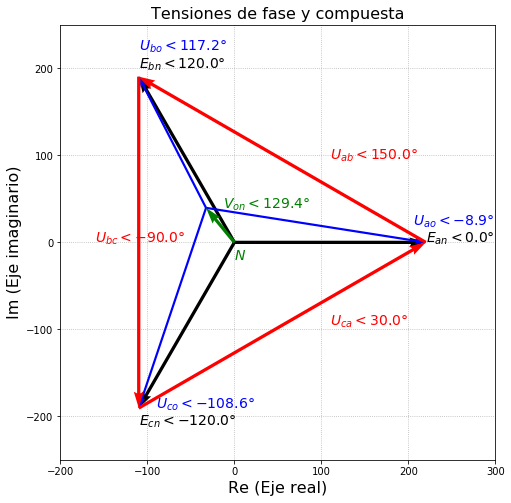

Tensiones de generación:
Ean = 220.00+0.00j  V = (220.00 < 0.00°) V
Ebn = -110.00+190.53j  V = (220.00 < 120.00°) V
Ecn = -110.00-190.53j  V = (220.00 < -120.00°) V
Tensiones compuestas:
Uab = -330.00+190.53j  V = (381.05 < 150.00°) V
Ubc = -0.00-381.05j  V = (381.05 < -90.00°) V
Uca = 330.00+190.53j  V = (220.00 < 30.00°) V
Tensión de desplazamiento de neutro:
Von = -32.61+39.68j  V = (51.35 < 129.41°) V
Tensiones de fase:
Uao =  252.61-39.68j V = (255.70 < -8.93°) V
Ubo = -77.39+150.85j V = (169.55 < 117.16°) V
Uco = -77.39-230.20j V = (242.86 < -108.58°) V


In [43]:
%matplotlib inline
plt.figure(figsize=(8,8))
ax = plt.gca()
ax.quiver(0,0,Ean.real,Ean.imag,angles='xy',scale_units='xy',scale=1)
ax.quiver(0,0,Ebn.real,Ebn.imag,angles='xy',scale_units='xy',scale=1)
ax.quiver(0,0,Ecn.real,Ecn.imag,angles='xy',scale_units='xy',scale=1)
ax.quiver(Von.real,Von.imag,Uao.real,Uao.imag,width=0.005,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(Von.real,Von.imag,Ubo.real,Ubo.imag,width=0.005,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(Von.real,Von.imag,Uco.real,Uco.imag,width=0.005,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(0,0,Von.real,Von.imag,angles='xy',scale_units='xy',scale=1,color='green')
ax.quiver(Ean.real,Ean.imag,Uab.real,Uab.imag,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(Ecn.real,Ecn.imag,Uca.real,Uca.imag,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(Ebn.real,Ebn.imag,Ubc.real,Ubc.imag,angles='xy',scale_units='xy',scale=1,color='red')
plt.text(Ean.real, Ean.imag, r'$E_{an} < %.1f°$'%(np.rad2deg(cmath.phase(Ean))), fontsize=14)
plt.text(Ebn.real, Ebn.imag + 10, r'$E_{bn} < %.1f°$'%(np.rad2deg(cmath.phase(Ebn))), fontsize=14)
plt.text(Ecn.real, Ecn.imag - 20, r'$E_{cn} < %.1f°$'%(np.rad2deg(cmath.phase(Ecn))), fontsize=14)
plt.text(Ean.real/2, Ebn.imag/2, r'$U_{ab} < %.1f°$'%(np.rad2deg(cmath.phase(Uab))), fontsize=14,color='red')
plt.text(Ean.real/2, Ecn.imag/2, r'$U_{ca} < %.1f°$'%(np.rad2deg(cmath.phase(Uca))), fontsize=14,color='red')
plt.text(Ebn.real - 50, 0, r'$U_{bc} < %.1f°$'%(np.rad2deg(cmath.phase(Ubc))), fontsize=14,color='red')
plt.text(Von.real + 20, Von.imag, r'$V_{on} < %.1f°$'%(np.rad2deg(cmath.phase(Von))), fontsize=14,color='green')
plt.text(Uao.real + Von.real - 15, Uao.imag + Von.imag + 20, r'$U_{ao} < %.1f°$'%(np.rad2deg(cmath.phase(Uao))), fontsize=14,color='blue')
plt.text(Ubo.real + Von.real, Ubo.imag + Von.imag + 30, r'$U_{bo} < %.1f°$'%(np.rad2deg(cmath.phase(Ubo))), fontsize=14,color='blue')
plt.text(Uco.real + Von.real + 20, Uco.imag + Von.imag, r'$U_{co} < %.1f°$'%(np.rad2deg(cmath.phase(Uco))), fontsize=14,color='blue')
plt.text(0, -20, r'$N$', fontsize=14,color='green')
ax.set_aspect('equal')
plt.title('Tensiones de fase y compuesta', fontsize=16)
plt.xlabel('Re (Eje real)',  fontsize=16)
plt.ylabel('Im (Eje imaginario)',  fontsize=16)
plt.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_xlim([-200,300])
ax.set_ylim([-250,250])
#plt.draw()
plt.show()
print('Tensiones de generación:')
print('Ean = {:.2f}  V = (%.2f < %.2f°) V'.format(Ean)%(abs(Ean), np.rad2deg(cmath.phase(Ean)) ))
print('Ebn = {:.2f}  V = (%.2f < %.2f°) V'.format(Ebn)%(abs(Ebn), np.rad2deg(cmath.phase(Ebn)) ))
print('Ecn = {:.2f}  V = (%.2f < %.2f°) V'.format(Ecn)%(abs(Ecn), np.rad2deg(cmath.phase(Ecn)) ))
print('Tensiones compuestas:')
print('Uab = {:.2f}  V = (%.2f < %.2f°) V'.format(Uab)%(abs(Uab), np.rad2deg(cmath.phase(Uab)) ))
print('Ubc = {:.2f}  V = (%.2f < %.2f°) V'.format(Ubc)%(abs(Ubc), np.rad2deg(cmath.phase(Ubc)) ))
print('Uca = {:.2f}  V = (%.2f < %.2f°) V'.format(Uca)%(abs(Ecn), np.rad2deg(cmath.phase(Uca)) ))
print('Tensión de desplazamiento de neutro:')
print('Von = {:.2f}  V = (%.2f < %.2f°) V'.format(Von)%(abs(Von), np.rad2deg(cmath.phase(Von)) ))
print('Tensiones de fase:')
print('Uao =  {:.2f} V = (%.2f < %.2f°) V'.format(Uao)%(abs(Uao), np.rad2deg(cmath.phase(Uao)) ))
print('Ubo = {:.2f} V = (%.2f < %.2f°) V'.format(Ubo)%(abs(Ubo), np.rad2deg(cmath.phase(Ubo)) ))
print('Uco = {:.2f} V = (%.2f < %.2f°) V'.format(Uco)%(abs(Uco), np.rad2deg(cmath.phase(Uco)) ))

-----------
<a href="https://colab.research.google.com/github/daniel-lorenzo/Electrotecnia/blob/master/Ejercitacion/TP4entrega.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>